# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from numpy.random import randn
%matplotlib inline

In [2]:
from numpy.random import randn
np.random.seed(101)
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


**Selecting Rows**

In [3]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

**Or select based off of position instead of label**

In [4]:
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

**Selecting subset of rows and columns**

In [5]:
df.loc['B','Y']

-0.8480769834036315

In [6]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


**Conditional Selection**

In [7]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [21]:
sal= pd.read_csv("Salaries.csv")

In [24]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#### How many people have the word Chief in their job title?

In [29]:
jobs = sal["JobTitle"].tolist()

In [30]:
chiefs = list(filter(lambda x: 'CHIEF' in x.upper(), jobs))
len(chiefs)

627

In [33]:
sal["JobTitle"].apply(lambda x: 'CHIEF' in x.upper()).value_counts()

False    148027
True        627
Name: JobTitle, dtype: int64

In [34]:
ecom= pd.read_csv("Ecommerce Purchases")

In [35]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


#### What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) 

In [36]:
ecom["Email"].apply(lambda x: x.split("@")[1]).value_counts().head()

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

#### Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction?

In [37]:
ecom[ecom["Lot"]=="90 WT"]["Purchase Price"]

513    75.1
Name: Purchase Price, dtype: float64

**Reset Index**

In [8]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [9]:
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


**set index**

In [10]:
df['W'].is_unique

True

In [11]:
df.set_index('W',inplace=True)
df

,X,Y,Z
W,,,
2.706850,0.628133,0.907969,0.503826
0.651118,-0.319318,-0.848077,0.605965
-2.018168,0.740122,0.528813,-0.589001
0.188695,-0.758872,-0.933237,0.955057
0.190794,1.978757,2.605967,0.683509


#### Multi-Index and Index Hierarchy

In [12]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index

[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]

In [13]:
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [14]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.302665  1.693723
   2 -1.706086 -1.159119
   3 -0.134841  0.390528
G2 1  0.166905  0.184502
   2  0.807706  0.072960
   3  0.638787  0.329646

In [15]:
df.index.names = ['Group','Num']
df

A         B
Group Num                    
G1    1    0.302665  1.693723
      2   -1.706086 -1.159119
      3   -0.134841  0.390528
G2    1    0.166905  0.184502
      2    0.807706  0.072960
      3    0.638787  0.329646

In [16]:
df.xs(key=('G1',1)) 

A    0.302665
B    1.693723
Name: (G1, 1), dtype: float64

In [17]:
df.xs(key=1,level='Num') #key is label when level used

,A,B
Group,,
G1,0.302665,1.693723
G2,0.166905,0.184502


In [18]:
np.random.seed(101)
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df['W']= [100, 200, 500, np.nan, '']
df

,W,X,Y,Z
A,100,0.628133,0.907969,0.503826
B,200,-0.319318,-0.848077,0.605965
C,500,0.740122,0.528813,-0.589001
D,NaN,-0.758872,-0.933237,0.955057
E,,1.978757,2.605967,0.683509


In [19]:
df.isnull().sum()

W    1
X    0
Y    0
Z    0
dtype: int64

# Axis

1. one may choose to specify axis='index' (instead of axis=0) or axis='columns' (instead of axis=1).
2. Let us understand this with an example. We have a dataframe df and it has shape as (5, 10), meaning it has 5 rows and 10 columns.
- Now when we do `df.mean(axis=1)` it means that dimension 1 would be changed, this implies that it would have the same number of rows but a different number of columns. Hence the result that would get would be of the shape (5, 1).
- Similarly, if we do `df.mean(axis=0)` it means that dimension 0 would be changed, meaning the number of rows would be changed but the number of columns would remain the same, hence the result would be of shape (1, 10).
3. Axis 0 will act on all the ROWS in each COLUMN
4. Axis 1 will act on all the COLUMNS in each ROW

**Table of Contents**
1. Introduction
2. Gathering Data
3. Assessing Data
4. Cleaning Data
5. Analyzing Data
6. Visualization

In [20]:
#Loading the dataset
titanic= sns.load_dataset('titanic')

# Asessing and cleaning Data

#### Step 1: Asessing
- `df.shape`: know the number of rows and columns
- `len(df)`: number of rows
- `df.info()`: know the dtype of each column and null values
- `df.describe()`: know the min, max and mean and look for out of range values, descriptive statistics for numeric variables
- `df.head()`: first 5 rows
- `df.tail()`: first 5 rows
- `df.sample(n)`: random n rows
- `df.isnull().sum()`:Columns/variables with missing values mentioned
- `sum(df.duplicated()) or df.duplicated().sum()`: number of overall duplicated rows
- `df.loc[df.duplicated(keep= False), :]`: Extract **all** duplicate rows, by default, keep is 'first' which keeps the first as is and second value is counted as duplicate [Click here](#duplicate)

- `df['column name'].value_counts(normalize: 'bool' = False,sort: 'bool' = True,ascending: 'bool' = False,dropna: 'bool' = True,)`: Get unique value-count for each feature
    [Click here](#valuecounts)
    
- `df['Complaint Type'].unique()`: List of unique values in a column name specified. Value(not includiung count) for value_counts()
- `df['Complaint Type'].nunique()`: Nummber of unique values in a column name specified. 
- `df.columns`: List of column names
- `df.index.values`: Array of index values
- Get Column Name : List of unique values (less than 3)
  ```rem=[]
     for x in df1.columns:
       if df1[x].nunique()<=3:
         print(x+ " "*10+" : ",df1[x].unique())
         rem.append(x)  
- Selecting dtype [Click here](#datatype): 
  - `df.select_dtypes(include='number').head()`: This include both int and float columns
  -  `df.select_dtypes(include='object')`:select just object columns
  - `df.select_dtypes(include=['int', 'datetime', 'object'])`: select multiple data types
- Renaming columns:
  -  `df.rename(columns= {"oldname": "newname", "oldname2": "newname2"},index= {"oldname": "newname", "oldname2": "newname2"},inplace= True)`

**df1= df.copy()**

#### Step 2: Missing data
1. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “not available” or “NA”.`df1.replace(["Missing", "Not available"], np.nan, inplace=True)`
2. For datetime64[ns] types, NaT represents missing values. 
3. If you want to consider inf and -inf to be “NA” in computations, you can set `pandas.options.mode.use_inf_as_na = True` or `df1.replace([np.inf, -np.inf], np.nan, inplace=True)`
4. NA groups in GroupBy are automatically excluded.
5. `df.isnull()`: This function takes a scalar or array-like object and indicates whether values are missing (`NaN` in numeric arrays, `None` or `NaN` in object arrays, `NaT` in datetimelike).

**checking columns and deleting**
- `df.isnull().sum()/len(df)*100`: % of missing values in each column (column Name: % of missing values)
- `df.isnull().sum().plot(kind='bar', figsize=(10,5),title = 'missing values')`: Draw a frequency plot to show the number of null values in each column of the DataFrame
- `df1=df1.loc[:,(df1.isnull().sum()/len(df1)*100)<=50]` : Drop the columns which have 50% data in rows missing
- `df1.drop([list of column names to be deleted],axis=1,inplace=True)` : Drop specific columns

**checking rows and deleting**
- `df1["Column Name"].notnull().sum()`: Number of filled rows
- `df1["Column Name"].isnull().sum()`: Number of np.nan rows
- `df1.dropna(threshold= int, inplace= True, axis=0 for rows or 1 for column)` : [Click here](#dropvalues) and thresh : int, optional:Require that many non-NA values.Subset= ['col1', 'col2']Define in which columns to look for missing values.


#### Step 3: Converting data types

The simplest way to convert data type from one to the other is to use astype() method. The method is supported by both Pandas DataFrame and Series. If you already have a numeric data type (int8, int16, int32, int64, float16, float32, float64, float128, and boolean) you can also use astype() to:

- convert it to another numeric data type (int to float, float to int, etc.) 
- use it to downcast to a smaller or upcast to a larger byte size 
- However, astype() won’t work for a column of mixed types. 
- The Pandas pd.to_numeric() function can handle these values more gracefully. Rather than fail, we can set the argument errors='coerce' to coerce invalid values to NaN

[Click here](#stringtonumbers)

**Object to datetime**
- `df1["Created Date"]=pd.to_datetime(df1['Created Date'], errors= "coerce")`: If :const:`'coerce'`, then invalid parsing will be set as :const:`NaT`

**String to numeric**
- `df['sales'] = pd.to_numeric(df['sales'], errors='coerce')`
- `df['price'] = df['price'].astype(int)`


**Convert continuous data into categorical data**

Pandas has 2 built-in functions cut() and qcut() for transforming numerical data into categorical data.
- `pd.cut(x,bins,labels=None)` bins data into discrete intervals based on bin edges
- `pd.qcut(x,bins)` bins data into discrete intervals based on sample quantiles

[Click here](#cqcut)

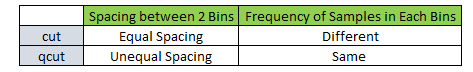

**Convert categorical data into a numerical form**
The most widely used encoding techniques are:
[Click here](#encoding)
- Integer Encoding: encodes the values as integer.
- One-Hot Encoding: encodes the values as a binary vector array: if we have K possible values for a categorical variable, we will get K columns to represent it
  - `df1= pd.get_dummies(df1, columns=[list of column names to be encoded], prefix= {'coln name': 'prefix', 'colmn name': 'prefix'})`
- Dummy Variable Encoding: same as One-Hot Encoding, but one less column.
  - `df1= pd.get_dummies(df1, columns=[list of column names to be encoded],prefix= {'coln name': 'prefix', 'colmn name': 'prefix'}, drop_first= True)`
  - Always drop the baseline category, one of the encoded columns (which column does not matter) The intercept coefficient will be the prediction on the baseline category The remaining coefficients are comparisons to the baseline category

#### Step 5: Filling missing values [Click here](#fillvalues)
**Fillna** 
axis=0 for rows
- `df1.fillna(axis=0, method='ffill', inplace= True)` : To replace NaN values with the values in the previous row
- `df1.fillna(axis=0, method='bfill', inplace= True)` : Replace with the values in the next row
- `df1['column name'].fillna(axis=0,value= df1["Column Name"].mean(), inplace= True)`: To replace NaN values with the mean

#### Step 6: SORTING [Click here](#sorting)
**SORT_VALUES** 
- `df1.sort_values(by=['COL1', 'COL2'], ascending=[True, False], inplace=True)`
- #### string category to categorical to sorting:

```from pandas.api.types import CategoricalDtype
df['size'] = df['size'].astype(CategoricalDtype([list of values], ordered= True))
sf.sort_values(by=['size']```

#### Step 7: Manipulating data 
- **Melt** [Click here](#melt)
  - `pd.melt(df1, id_vars=['Name', 'Age'], var_name='Subject', value_name='Grades')`
  - id_vars: columns to keep
  - value_vars: tuple, list: Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
  - value_name: Name to use for the ‘value’ column
  - var_name: Name to use for the ‘variable’ column
- **Merge**: The basics - types of joins (LEFT, RIGHT, OUTER, INNER) [Click here](#merge)
    - `left2.merge(right2, left_on='keyLeft', right_on='keyRight', how='inner')`
    - merging with different column names
    - merging with multiple columns
    - avoiding duplicate merge key column in output
- **Transform** [Click here](#transform)
 - `df1.groupby('city')['sales'].transform('sum')`
- **Crosstab** [Click here](#crosstab)
   - `pd.crosstab(index=df1['sex'], columns= df1['embarked'], margins=True, normalize=True).style.format('{:.2%}')`
   - By default, crosstab performs the count aggregation function on all numerical columns and returns the result. To explicitly specify the columns we care about and perform aggregation, use the values and aggfunc arguments.
   - `pd.crosstab(index=df1['sex'], columns= df1['embarked'], values = df1['fare'],aggfunc = 'mean')`
- **Pivot** [Click here](#pivot)
  - `df1.pivot_table(index=['sex'],columns=['embarked'],values=['fare'], aggfunc=['sum', 'count'], fill_value=0, margins=True)`
  - fill_value : scalar, Value to replace missing values with (in the resulting pivot table,after aggregation)
  - margins : bool,Add all row / columns (e.g. for subtotal / grand totals).
- **Group by** [Click here](#groupby)
  - `df1.groupby(by='sex')['fare'].agg(['max', 'min', 'count', 'median', 'mean'])`
- **Regex** [Click here](#regex)
 - **str. methods:**
   - `df['col'].str.contains('pattern')`: Return boolean Series based on whether a given pattern or regex is contained within a string of a Series 
   - `df['col'].str.extract('pattern')`: Extract capture groups in the regex pat as columns in a DataFrame.Non-matches will be NaN
 - **Character class**    
      - `.` means "any character". Matches any character except newline (matches newline in single-line)
      - `*` means "any number of this".
      - `.*` therefore means an arbitrary string of arbitrary length.
      - `^` indicates the beginning of the string.
      - `$` indicates the end of the string.
      - `\s`        Matches white space characters.
      - `\S`        Matches anything but white space characters.
      - `\d`        Matches digits. Equivalent to [0-9].
      - `\D`        Matches anything but digits. Equivalent to [^0-9].
      - `\w`        Matches letters, digits and underscores. Equivalent to [A-Za-z0-9_].
      - `\W`        Matches anything but letters, digits and underscores.
  - **Anchors**
    - `^`   Matches at the start of string or start of line if multi-line mode is
	enabled. Many regex implementations have multi-line mode enabled by
	default.

    - `$`   Matches at the end of string or end of line if multi-line mode is enabled.
	Many regex implementations have multi-line mode enabled by default.

   - `\A`  Matches at the start of the search string.

   - `\Z`  Matches at the end of the search string, or before a newline at the end of the string.

    - `\z`Matches at the end of the search string.

    - `\b`  Matches at word boundaries.
    - `\B`  Matches anywhere but word boundaries.
  - **Special Characters**
    - `\`   Escape character.
    - `\n`  Matches newline.
    - `\t`  Matches tab.
  - **Bracket Expressions**
    - `[adf]`   Matches characters a or d or f.
    - `[^adf]`  Matches anything but characters a, d and f.
    - `[a-f]`   Match any lowercase letter between a and f inclusive.
    - `[A-F]`   Match any uppercase letter between A and F inclusive.
    - `[0-9]`   Match any digit between 0 and 9 inclusive.
  - **Quantifiers**
    - `*?`      Zero or more, lazy. Matches will be as small as possible.
    - `+`       One or more. Matches will be as large as possible.
    - `+?`      One or more, lazy. Matches will be as small as possible.
    - `?`       Zero or one. Matches will be as large as possible.
    - `??`      Zero or one, lazy. Matches will be as small as possible.
    - `{2}`     Two exactly.
    - `{2,}`    Two or more. Matches will be as large as possible.
    - `{2,}?`   Two or more, lazy. Matches will be as small as possible.
    - `{2,4}`   Two, three or four. Matches will be as large as possible.
    - `{2,4}?`  Two, three or four, lazy. Matches will be as small as possible.
  - **Groups**
    - `(foo|bar)`    Matches pattern foo or bar.
    - `(foo)`        Define a group (or subpattern) consisting of pattern foo.Matches within the group can be referenced in a replacement using a backreference. Regular expressions allow us to not just match text but also to extract information for further processing. This is done by defining groups of characters and capturing them using the special parentheses ( and ) metacharacters. Any subpattern inside a pair of parentheses will be captured as a group. 
    - `(?<foo>bar)`  Define a named group named "foo" consisting of pattern bar.Matches within the group can be referenced in a replacement using the backreference $foo.
    - `(?:foo)`   Define a passive group consisting of pattern foo. Passive groups cannot be referenced in a replacement using a backreference.
    - `(?>foo+)bar`  Define an atomic group consisting of pattern foo+. Once foo+ has been matched, the regex engine will not try to find other variable length matches of foo+ in order to find a match followed by a match of bar. Atomic groups may be used for perforamce reasons.
    
- **Map/Applymap/apply**[Click here](#map)
  - First major difference: **DEFINITION**
    - `map` is defined on Series ONLY
    - `applymap` is defined on DataFrames ONLY
    - `apply` is defined on BOTH
  - map works element-wise on a Series
  - applymap works element-wise on a DataFrame
  - apply works on a row / column basis of a DataFrame
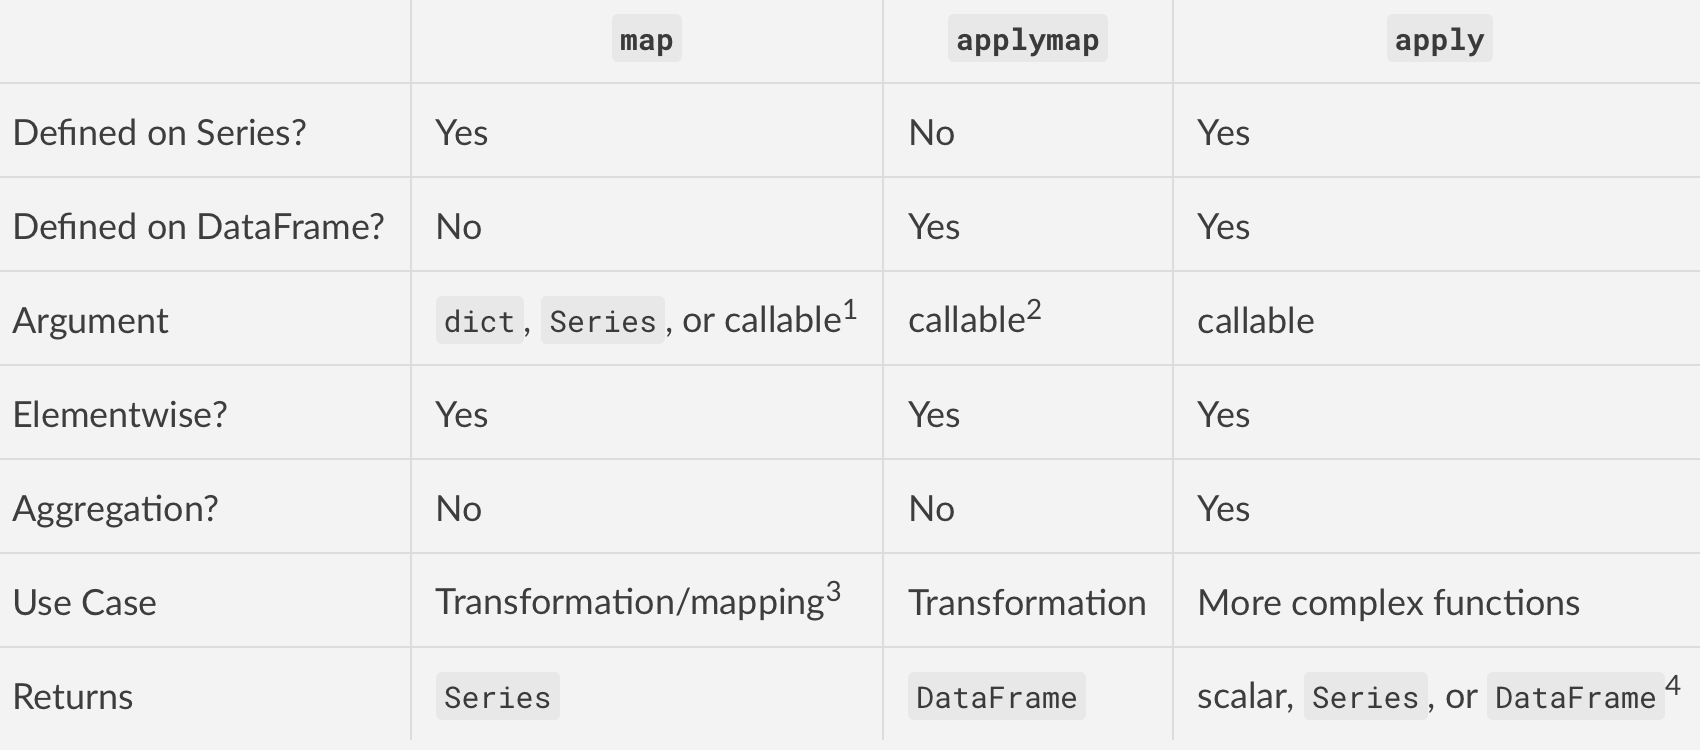

- **Concatenate** [Click here](#concatenate)
   - Stack the DataFrames on top of each other: `vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)`
   - Place the DataFrames side by side :`horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)`
   - If the index labels are different (e.g., if `df_a.index == [0, 1, 2]` and `df_b.index == [10, 20, 30] are True)`, a straightforward join (or concat or merge) may produce NaN rows. A useful method in that case is set_axis() that coerces the indices to be the same. `concatenated_df = pd.concat([df_a, df_b.set_axis(df_a.index)], axis=1)`
   
- **Query**[Click here](#query)
  - Query the columns of a DataFrame with a boolean expression
  -` df.query('a > b')`

#### Step-8: IQR (Interquartile range ) technique for outlier treatment [Click here](#iqr)

1. ```def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range```

#### Step 9: Datetime Extraction

1. convert datetime series to a particular format in STRING: `df1['Columnname'].st.strftime('format')`
[Click here](#strf)
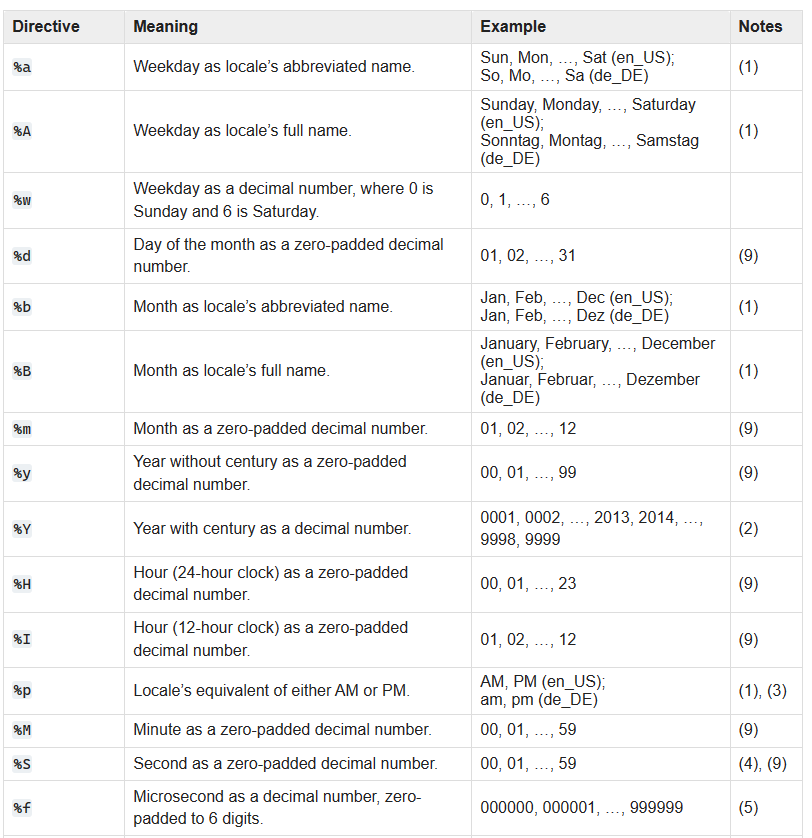

# Query
<a id='query'></a>

In [2]:
df = pd.DataFrame(randn(10, 2), columns=list('ab'))
df

,a,b
0,-0.220036,0.634638
1,0.089903,-0.196699
2,-0.372130,-2.189006
3,-1.816566,-0.925637
4,-1.115077,1.647665
5,0.466981,-1.388143
6,-0.375771,2.526326
7,-0.309000,0.133931
8,-0.550204,-1.684643
9,-2.785887,0.440667


In [9]:
df2 = pd.DataFrame(randn(10, 2), columns=list('ab'))
df2

,a,b
0,-0.970898,1.266620
1,0.380803,1.739665
2,0.089814,-1.339514
3,-0.817451,0.125022
4,-2.025658,1.423539
5,0.128995,-0.035391
6,0.311221,1.342183
7,0.872214,-1.008008
8,0.406537,0.144070
9,-1.865111,0.643522


In [3]:
df[df['a'] > df['b']]

,a,b
1,0.089903,-0.196699
2,-0.372130,-2.189006
5,0.466981,-1.388143
8,-0.550204,-1.684643


In [4]:
 df.query('a > b')

,a,b
1,0.089903,-0.196699
2,-0.372130,-2.189006
5,0.466981,-1.388143
8,-0.550204,-1.684643


In [5]:
df.query("a!= 5 & b != 5")

,a,b
0,-0.220036,0.634638
1,0.089903,-0.196699
2,-0.372130,-2.189006
3,-1.816566,-0.925637
4,-1.115077,1.647665
5,0.466981,-1.388143
6,-0.375771,2.526326
7,-0.309000,0.133931
8,-0.550204,-1.684643
9,-2.785887,0.440667


In [27]:
np.random.seed(5)
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value':[0,1,2,5]})
right = pd.DataFrame({'key': ['A', 'F', 'E', 'D'], 'value':[0,1,2,5]})
left

,key,value
0,A,0
1,B,1
2,C,2
3,D,5


In [28]:
right

,key,value
0,A,0
1,F,1
2,E,2
3,D,5


In [29]:
left.query("key in @right")

,key,value


In [32]:
left.query("key == 'A'| value==0")

,key,value
0,A,0


# Datetime Extraction
<a id='strf'></a>

In [14]:
df1= pd.read_csv('./201902-fordgobike-tripdata.csv')
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [16]:
df1['start_time'] = pd.to_datetime(df1['start_time'])

In [17]:
df1['start_hour_of_day'] = df1['start_time'].dt.strftime('%H')
df1['start_day_of_week'] = df1['start_time'].dt.strftime('%A')
df1['start_month'] = df1['start_time'].dt.strftime('%b')
df1['start_date'] = df1['start_time'].dt.strftime('%Y-%m-%d')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [24]:
df1.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour_of_day,start_day_of_week,start_month,start_date
102697,743,2019-02-14 15:56:52.668,2019-02-14 16:09:15.8500,251.0,California St at University Ave,37.870555,-122.27972,249.0,Russell St at College Ave,37.858473,-122.253253,4679,Subscriber,1991.0,Male,No,15,Thursday,Feb,2019-02-14


In [25]:
df1['start_hour_of_day']= df1['start_hour_of_day'].astype(dtype='int32').replace(' 0', ' ')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

# IQR (Interquartile range ) technique for outlier treatment
<a id='iqr'></a>

In [21]:
def outlier_treatment(col):
 sorted(col)
 Q1,Q3 = np.percentile(col , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [22]:
np.random.seed(101)
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [23]:
outlier_treatment(df['W'])

(-0.5049386482918423, 1.3447519056843351)

# Concatenate
<a id='concatenate'></a>

In [30]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [31]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [32]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [47]:
df2.set_axis(df1.index, axis=0) #Assign desired index to given axis

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [33]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [34]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [35]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [48]:
pd.concat([df1, df2.set_axis(df1.index, axis=0)], axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


# Map/Applymap/apply
<a id='map'></a>

In [22]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'California'])
frame

,b,d,e
Utah,0.302665,1.693723,-1.706086
Ohio,-1.159119,-0.134841,0.390528
Texas,0.166905,0.184502,0.807706
California,0.072960,0.638787,0.329646


#### Map

In [23]:
frame['e'].map(lambda x: '%.2f'%(x))

Utah          -1.71
Ohio           0.39
Texas          0.81
California     0.33
Name: e, dtype: object

In [24]:
frame['e'].map('{:,.2f}'.format)

Utah          -1.71
Ohio           0.39
Texas          0.81
California     0.33
Name: e, dtype: object

In [25]:
frame['e'].apply(lambda x: '%.2f'%(x))

Utah          -1.71
Ohio           0.39
Texas          0.81
California     0.33
Name: e, dtype: object

#### Applymap

In [26]:
frame.applymap(lambda x: '%.2f'% (x))

,b,d,e
Utah,0.30,1.69,-1.71
Ohio,-1.16,-0.13,0.39
Texas,0.17,0.18,0.81
California,0.07,0.64,0.33


#### Apply

In [11]:
frame.apply(lambda x: x.max() - x.min(), axis=0) # 0 or 'index': apply function to each column.
# 1 or 'columns': apply function to each row.

b    2.492328
d    1.686123
e    3.137427
dtype: float64

In [12]:
frame.apply(lambda x: x.max() - x.min(), axis=1) # 0 or 'index': apply function to each column.
# 1 or 'columns': apply function to each row.

Utah          1.672919
Ohio          1.124727
Texas         2.327007
California    1.250853
dtype: float64

# Merge
<a id='merge'></a>

In [3]:
np.random.seed(0)
left = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value': np.random.randn(4)})
right = pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value': np.random.randn(4)})

In [4]:
left

,key,value
0,A,1.764052
1,B,0.400157
2,C,0.978738
3,D,2.240893


In [5]:
right

,key,value
0,B,1.867558
1,D,-0.977278
2,E,0.950088
3,F,-0.151357


In [6]:
left.merge(right, on='key', how='inner')

,key,value_x,value_y
0,B,0.400157,1.867558
1,D,2.240893,-0.977278


In [7]:
left.merge(right, on='key', how='left')

,key,value_x,value_y
0,A,1.764052,NaN
1,B,0.400157,1.867558
2,C,0.978738,NaN
3,D,2.240893,-0.977278


In [8]:
left.merge(right, on='key', how='right')

,key,value_x,value_y
0,B,0.400157,1.867558
1,D,2.240893,-0.977278
2,E,NaN,0.950088
3,F,NaN,-0.151357


In [9]:
left.merge(right, on='key', how='outer')

,key,value_x,value_y
0,A,1.764052,NaN
1,B,0.400157,1.867558
2,C,0.978738,NaN
3,D,2.240893,-0.977278
4,E,NaN,0.950088
5,F,NaN,-0.151357


In [10]:
left2 = left.rename({'key':'keyLeft'}, axis=1)
right2 = right.rename({'key':'keyRight'}, axis=1)
left2

,keyLeft,value
0,A,1.764052
1,B,0.400157
2,C,0.978738
3,D,2.240893


In [11]:
right2

,keyRight,value
0,B,1.867558
1,D,-0.977278
2,E,0.950088
3,F,-0.151357


In [12]:
left2.merge(right2, left_on='keyLeft', right_on='keyRight', how='inner')

,keyLeft,value_x,keyRight,value_y
0,B,0.400157,B,1.867558
1,D,2.240893,D,-0.977278


In [13]:
left

,key,value
0,A,1.764052
1,B,0.400157
2,C,0.978738
3,D,2.240893


In [14]:
right3 = right.assign(newcol=np.arange(len(right)))
right3

,key,value,newcol
0,B,1.867558,0
1,D,-0.977278,1
2,E,0.950088,2
3,F,-0.151357,3


If you are required to merge only "newcol" (without any of the other columns), you can usually just subset columns before merging:

In [15]:
left.merge(right3[['key', 'newcol']], on='key')

,key,value,newcol
0,B,0.400157,0
1,D,2.240893,1


# Melt
<a id='melt'></a>

In [10]:
import pandas as pd
df = pd.DataFrame({'Name': ['Bob', 'John', 'Foo', 'Bar', 'Alex', 'Tom'],
                   'Math': ['A+', 'B', 'A', 'F', 'D', 'C'],
                   'English': ['C', 'B', 'B', 'A+', 'F', 'A'],
                   'Age': [13, 16, 16, 15, 15, 13]})

In [11]:
df

,Name,Math,English,Age
0,Bob,A+,C,13
1,John,B,B,16
2,Foo,A,B,16
3,Bar,F,A+,15
4,Alex,D,F,15
5,Tom,C,A,13


In [14]:
pd.melt(df,id_vars=['Name', 'Age'], var_name='Subject', value_name='Grades')

,Name,Age,Subject,Grades
0,Bob,13,Math,A+
1,John,16,Math,B
2,Foo,16,Math,A
3,Bar,15,Math,F
4,Alex,15,Math,D
5,Tom,13,Math,C
6,Bob,13,English,C
7,John,16,English,B
8,Foo,16,English,B
9,Bar,15,English,A+


In [15]:
df.melt(
        id_vars=["Name", "Age"],
        value_vars="Math",
        var_name="Subject",
        value_name="Grades",
    )

,Name,Age,Subject,Grades
0,Bob,13,Math,A+
1,John,16,Math,B
2,Foo,16,Math,A
3,Bar,15,Math,F
4,Alex,15,Math,D
5,Tom,13,Math,C


# Crosstab Pivot Group by 
<a id='cpg'></a>

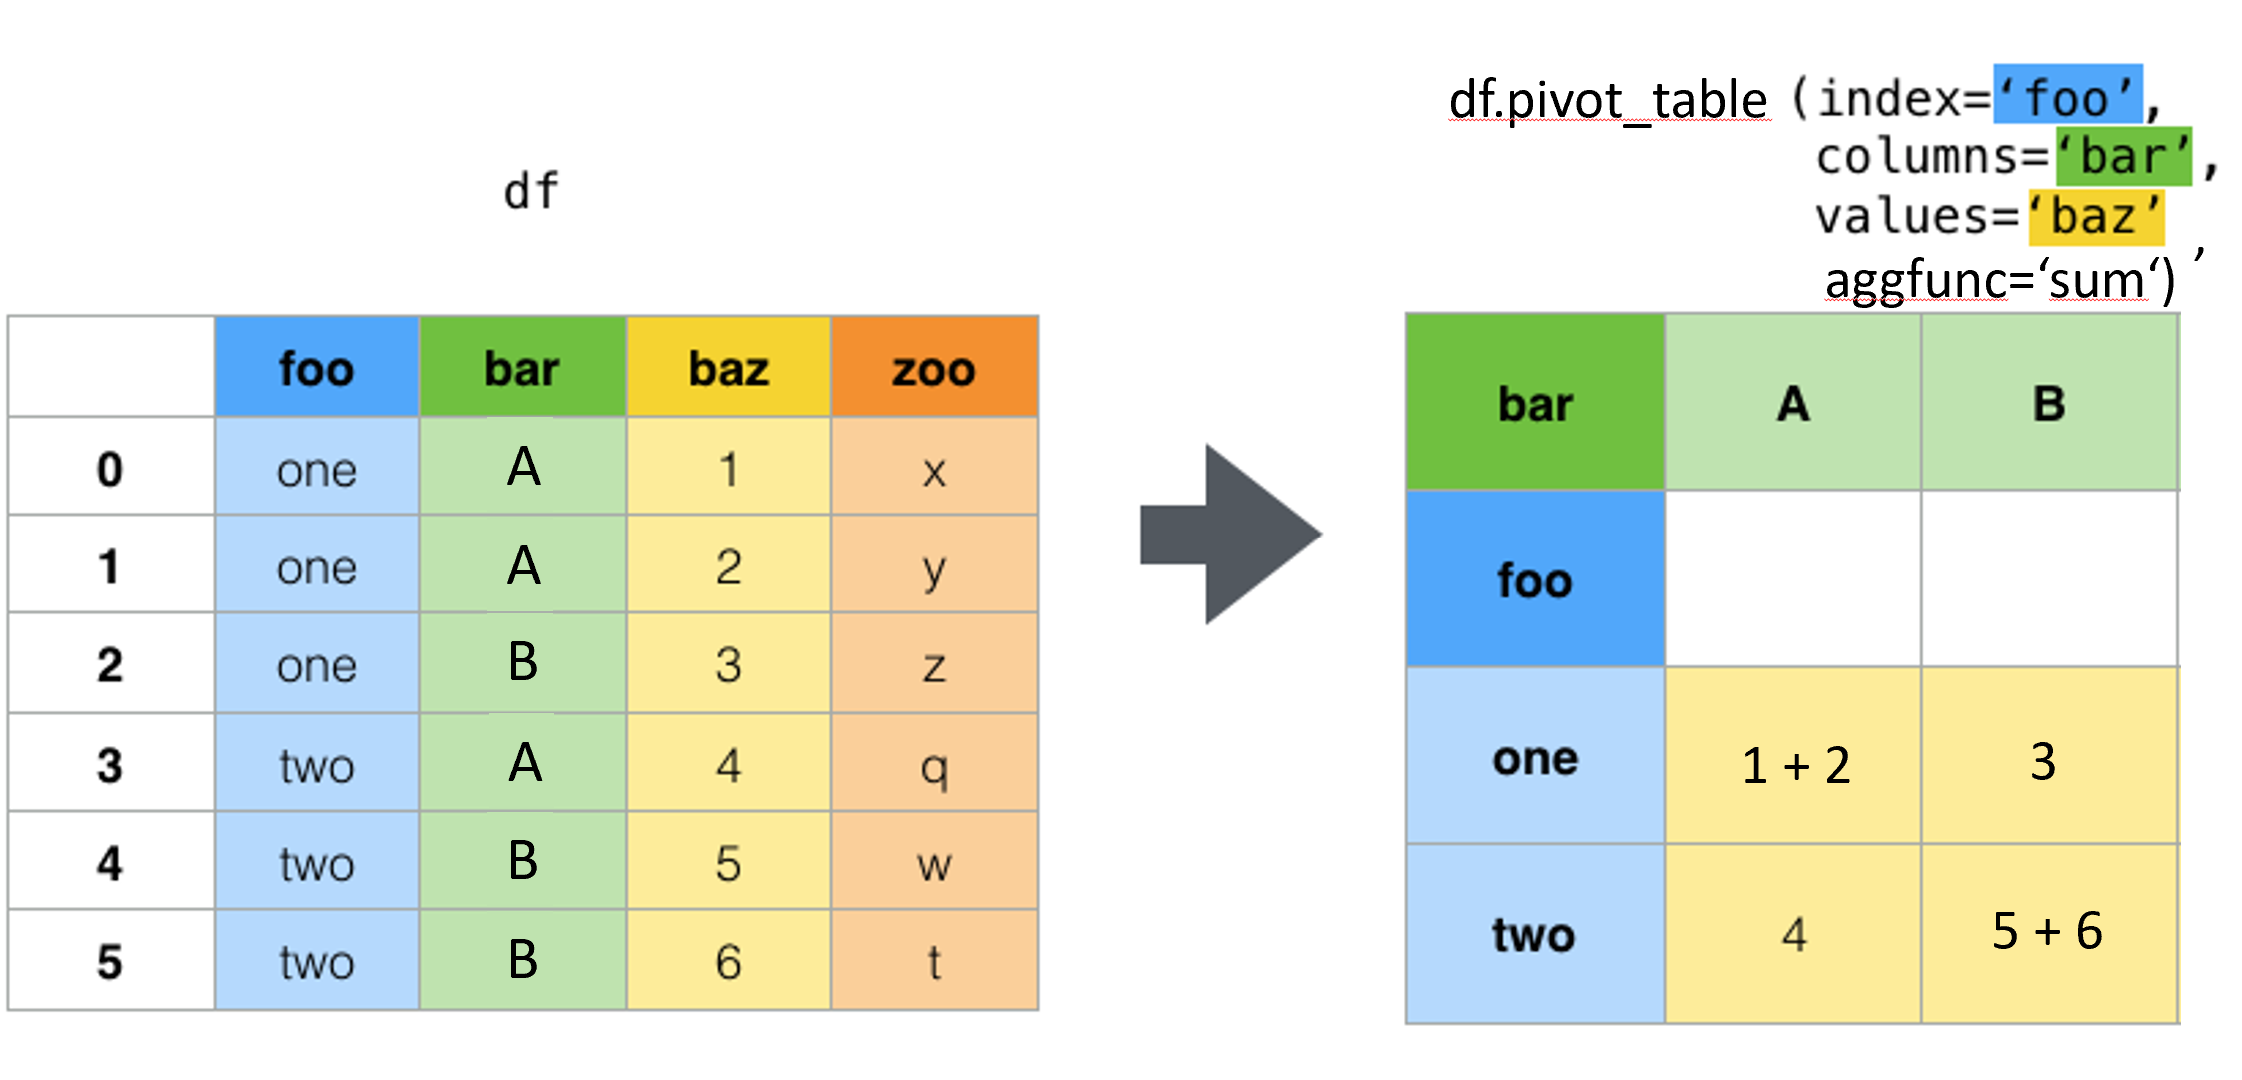
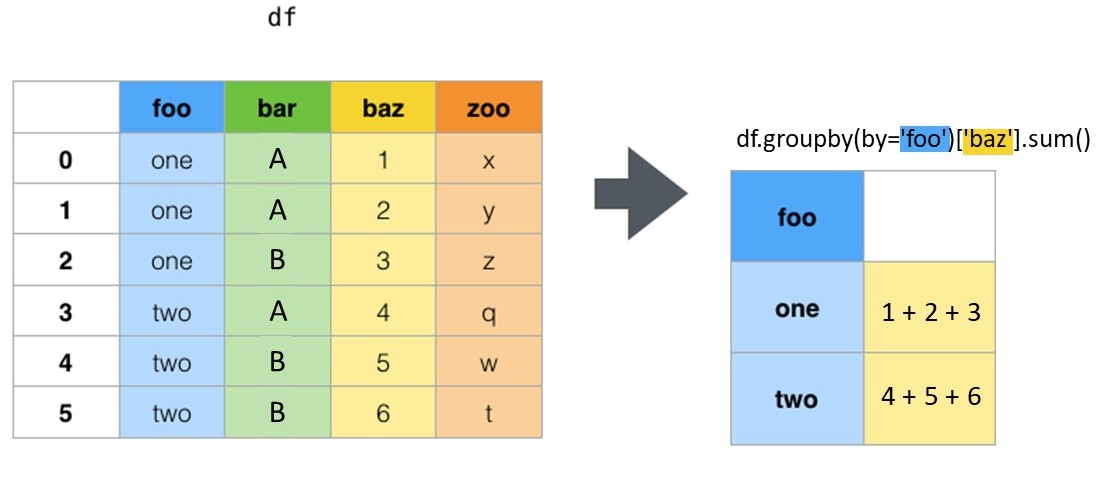

# df.groupby(by=grouping_columns)[columns_to_show].function()

In [21]:
import seaborn as sns

In [22]:
titanic= sns.load_dataset('titanic')

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Pivot
<a id='pivot'></a>

In [24]:
#Pivot table
titanic.pivot_table(index=['sex'],columns=['embarked'],values=['fare'], aggfunc=['sum', 'count'], fill_value=0, margins=True)

sum                                    count              
                fare                                     fare              
embarked           C          Q           S         All     C   Q    S  All
sex                                                                        
female     5487.3958   454.8585   7864.4085  13806.6628    73  36  203  312
male       4584.9004   567.3958   9574.9903  14727.2865    95  41  441  577
All       10072.2962  1022.2543  17439.3988  28533.9493   168  77  644  889

In [25]:
#Pivot table
titanic.pivot_table(index=['sex'],columns=['embarked'],values=['fare'], aggfunc=['sum', 'count'], fill_value=0)

sum                      count         
               fare                       fare         
embarked          C         Q          S     C   Q    S
sex                                                    
female    5487.3958  454.8585  7864.4085    73  36  203
male      4584.9004  567.3958  9574.9903    95  41  441

# Groupby
<a id='groupby'></a>

In [26]:
#Group by
titanic.groupby(by='sex')['fare'].agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
sex,,,,,
female,512.3292,6.75,314,23.0,44.479818
male,512.3292,0.00,577,10.5,25.523893


In [27]:
titanic.groupby(by='sex').size()

sex
female    314
male      577
dtype: int64

# Crosstab
<a id='crosstab'></a>

In [28]:
#crosstab
pd.crosstab(index=titanic['sex'], columns= titanic['embarked'])

embarked,C,Q,S
sex,,,
female,73,36,203
male,95,41,441


In [29]:
#crosstab
pd.crosstab(index=titanic['sex'], columns= titanic['embarked'], margins=True)

embarked,C,Q,S,All
sex,,,,
female,73,36,203,312
male,95,41,441,577
All,168,77,644,889


In [30]:
#crosstab
pd.crosstab(index=titanic['sex'], columns= titanic['embarked'], margins=True, normalize=True).style.format('{:.2%}')

embarked,C,Q,S,All
sex,,,,
female,8.21%,4.05%,22.83%,35.10%
male,10.69%,4.61%,49.61%,64.90%
All,18.90%,8.66%,72.44%,100.00%


By default, crosstab performs the count aggregation function on all numerical columns and returns the result. To explicitly specify the columns we care about and perform aggregation, use the values and aggfunc arguments.

In [31]:
pd.crosstab(index=titanic['sex'], columns= titanic['embarked'], values = titanic['fare'],aggfunc = 'mean')

embarked,C,Q,S
sex,,,
female,75.169805,12.634958,38.740929
male,48.262109,13.838922,21.711996


# Select columns by data type
<a id='datatype'></a>

In [32]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [33]:
# This include both int and float columns
titanic.select_dtypes(include='number').head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
titanic.select_dtypes(include=numerics)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [35]:
# select just object columns
titanic.select_dtypes(include='object')

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [36]:
# select multiple data types
titanic.select_dtypes(include=['int', 'datetime', 'object'])

,survived,pclass,sex,sibsp,parch,embarked,who,embark_town,alive
0,0,3,male,1,0,S,man,Southampton,no
1,1,1,female,1,0,C,woman,Cherbourg,yes
2,1,3,female,0,0,S,woman,Southampton,yes
3,1,1,female,1,0,S,woman,Southampton,yes
4,0,3,male,0,0,S,man,Southampton,no
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,man,Southampton,no
887,1,1,female,0,0,S,woman,Southampton,yes
888,0,3,female,1,2,S,woman,Southampton,no
889,1,1,male,0,0,C,man,Cherbourg,yes


## Convert strings to numbers
<a id='stringtonumbers'></a>

In [37]:
df = pd.DataFrame({ 'product': ['A','B','C','D'], 
                   'price': ['10','20','30','40'],
                   'sales': ['20','-','60','-']
                  })

In [38]:
df.dtypes

product    object
price      object
sales      object
dtype: object

In [39]:
# Use Python type
df['price'] = df['price'].astype(int)

In [40]:
# use to_numeric to convert the strings with Invalid characters
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [41]:
df

,product,price,sales
0,A,10,20.0
1,B,20,NaN
2,C,30,60.0
3,D,40,NaN


## Dropping missing values
<a id='dropvalues'></a>

##### To drop columns in which more than 10% of values are missing

In [42]:
df

,product,price,sales
0,A,10,20.0
1,B,20,NaN
2,C,30,60.0
3,D,40,NaN


In [43]:
df.dropna(thresh=len(df)*0.9, axis=1) 
# axis 1: Columns
#thresh : int, optional:Require that many non-NA values.

,product,price
0,A,10
1,B,20
2,C,30
3,D,40


In [44]:
df

,product,price,sales
0,A,10,20.0
1,B,20,NaN
2,C,30,60.0
3,D,40,NaN


In [45]:
# To drop rows if any NaN values are present
df.dropna(axis = 0)

,product,price,sales
0,A,10,20.0
2,C,30,60.0


In [46]:
# To drop columns if any NaN values are present
df.dropna(axis = 1)

,product,price
0,A,10
1,B,20
2,C,30
3,D,40


## Replacing missing values
<a id='fillvalues'></a>

In [47]:
df

,product,price,sales
0,A,10,20.0
1,B,20,NaN
2,C,30,60.0
3,D,40,NaN


In [48]:
# To replace all NaN values with a scalar
df.fillna(value=10)

,product,price,sales
0,A,10,20.0
1,B,20,10.0
2,C,30,60.0
3,D,40,10.0


In [49]:
# To replace NaN values with the values in the previous row.
df.fillna(axis=0, method='ffill')

,product,price,sales
0,A,10,20.0
1,B,20,20.0
2,C,30,60.0
3,D,40,60.0


In [50]:
# To replace NaN values with the values in the previous column.
df.fillna(axis=1, method='ffill')

,product,price,sales
0,A,10,20.0
1,B,20,20
2,C,30,60.0
3,D,40,40


In [51]:
# Replace with the values in the next row
df.fillna(axis=0, method='bfill')

,product,price,sales
0,A,10,20.0
1,B,20,60.0
2,C,30,60.0
3,D,40,NaN


In [52]:
# Replace with the values in the next column
df.fillna(axis=1, method='bfill')

,product,price,sales
0,A,10,20.0
1,B,20,NaN
2,C,30,60.0
3,D,40,NaN


In [53]:
# To replace NaN values with the mean
titanic['age'].fillna(value=titanic['age'].mean(), inplace=True)

In [54]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Convert continuous data into categorical data
<a id='cqcut'></a>

# CUT option

In [56]:
titanic['age'].describe() #make bins from min, 25%, 50%, 75%, max

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [57]:
titanic['describelevels']=pd.cut(titanic['age'], bins=[0, 22.00,29.69, 35.00, 80.00], labels=['<12', 'Teen', 'Adult', 'Older'])

In [58]:
titanic['ageGroup']=pd.cut(titanic['age'], bins=[0, 13, 19, 61, np.inf], labels=['<12', 'Teen', 'Adult', 'Older'])

In [59]:
titanic[titanic['age']==13]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,describelevels,ageGroup
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False,<12,<12
780,1,3,female,13.0,0,0,7.2292,C,Third,child,False,NaN,Cherbourg,yes,True,<12,<12


In [603]:
titanic['ageGroup'].value_counts()

Adult    708
Teen      93
<12       71
Older     19
Name: ageGroup, dtype: int64

In [604]:
titanic['ageGroup2']=pd.cut(titanic['age'],3)

In [605]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,ageGroup,ageGroup2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult,"(0.34, 26.947]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,"(26.947, 53.473]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,"(0.34, 26.947]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,"(26.947, 53.473]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,"(26.947, 53.473]"


In [606]:
titanic['ageGroup2'].dtype

CategoricalDtype(categories=[(0.34, 26.947], (26.947, 53.473], (53.473, 80.0]], ordered=True)

In [607]:
titanic['ageGroup'].dtype

CategoricalDtype(categories=['<12', 'Teen', 'Adult', 'Older'], ordered=True)

In [608]:
titanic['ageGroup2'].value_counts().sort_index()

(0.34, 26.947]      319
(26.947, 53.473]    522
(53.473, 80.0]       50
Name: ageGroup2, dtype: int64

#There is an argument right in Pandas cut() to configure whether bins include the rightmost edge or not. right defaults to True, which mean bins like[0, 12, 19, 61, 100] indicate (0,12], (12,19], (19,61],(61,100] . To include the leftmost edge, we can set right=False

In [609]:
titanic['ageGroup2']=pd.cut(titanic['age'],3, right= False)

In [610]:
titanic['ageGroup2'].dtype

CategoricalDtype(categories=[[0.42, 26.947), [26.947, 53.473), [53.473, 80.08)], ordered=True)

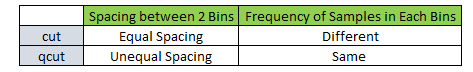

In [611]:
x=np.array([24,  7,  2, 25, 22, 29])
x

array([24,  7,  2, 25, 22, 29])

In [612]:
pd.cut(x,3).value_counts() #Bins size has equal interval of 9

(1.973, 11.0]    2
(11.0, 20.0]     0
(20.0, 29.0]     4
dtype: int64

In [613]:
pd.qcut(x,3).value_counts() #Equal frequecy of 2 in each bins

(1.999, 17.0]     2
(17.0, 24.333]    2
(24.333, 29.0]    2
dtype: int64

# Qcut option

In [614]:
titanic['age'].head(8)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
Name: age, dtype: float64

In [615]:
titanic['ageGroup-qcut']=pd.qcut(titanic['age'],4)

In [616]:
titanic['ageGroup-qcut'].value_counts()

(22.0, 29.699]    330
(0.419, 22.0]     231
(35.0, 80.0]      217
(29.699, 35.0]    113
Name: ageGroup-qcut, dtype: int64

# Value_counts
<a id='valuecounts'></a>

In [617]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

#### Sort results in ascending order

In [618]:
# Sort results in ascending order
titanic['embarked'].value_counts(ascending= True)

Q     77
C    168
S    644
Name: embarked, dtype: int64

#### Sort results alphabetically

In [619]:
# Sort results alphabetically
titanic['embarked'].value_counts(ascending= True).sort_index(ascending=True)

C    168
Q     77
S    644
Name: embarked, dtype: int64

#### Include NA in the result

In [620]:
#Include NA in the result
titanic['embarked'].value_counts(dropna= False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

#### Show result in a percentage count

In [621]:
#Show result in a percentage count
titanic['embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

In [622]:
#Show result in a percentage count
titanic['embarked'].value_counts(normalize=True).to_frame().style.format('{:.2%}')

,embarked
S,72.44%
C,18.90%
Q,8.66%


#### Bin continuous data into discrete intervals

In [623]:
#Bin continuous data into discrete intervals
titanic['fare'].value_counts(bins = 3)

(-0.513, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: fare, dtype: int64

In [624]:
titanic['fare'].value_counts(bins = [-1, 20, 100, 550])

(-1.001, 20.0]    515
(20.0, 100.0]     323
(100.0, 550.0]     53
Name: fare, dtype: int64

#### Group by and perform value_counts()

In [625]:
#Group by and perform value_counts()
titanic.groupby('embarked')['sex'].value_counts()

embarked  sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: sex, dtype: int64

In [626]:
titanic.groupby('embarked')['sex'].value_counts().to_frame()

sex
embarked sex        
C        male     95
         female   73
Q        male     41
         female   36
S        male    441
         female  203

# Dummy Variable Encoding
<a id='encoding'></a>

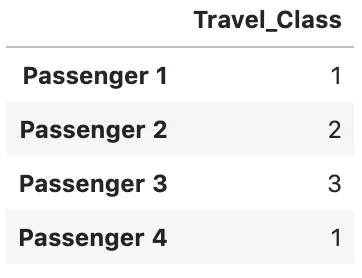

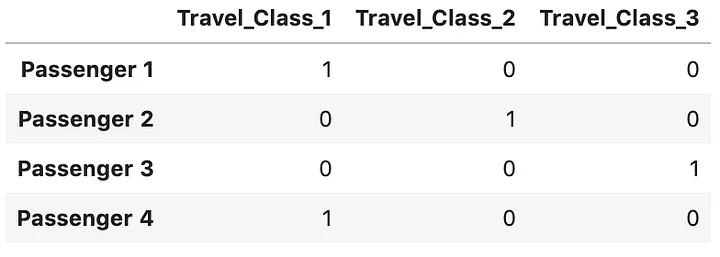

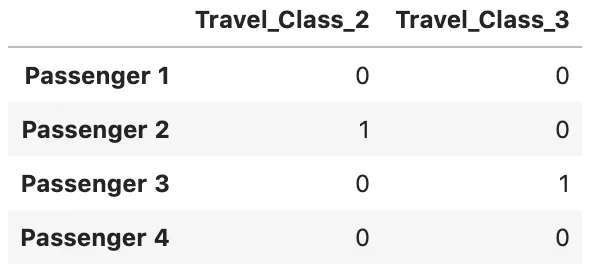

In [627]:
#One-Hot encoding variable for the Sex column
#if we have K possible values for a categorical variable, we will get K columns to represent it
pd.get_dummies(titanic['sex'], prefix='Sex')

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [628]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,ageGroup,ageGroup2,ageGroup-qcut
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult,"[0.42, 26.947)","(0.419, 22.0]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,"[26.947, 53.473)","(35.0, 80.0]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,"[0.42, 26.947)","(22.0, 29.699]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,"[26.947, 53.473)","(29.699, 35.0]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,"[26.947, 53.473)","(29.699, 35.0]"


In [629]:
#Creating a dummy encoding variable

In [630]:
pd.get_dummies(titanic['sex'], drop_first=True, prefix='Sex')

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [631]:
#For a variable that has more than two possible values
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [632]:
z=pd.get_dummies(titanic['embarked'], prefix='Embarked')

In [633]:
z

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [634]:
titanic = pd.concat([titanic, z], axis=1)

In [635]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,ageGroup,ageGroup2,ageGroup-qcut,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,NaN,Southampton,no,False,Adult,"[0.42, 26.947)","(0.419, 22.0]",0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,Adult,"[26.947, 53.473)","(35.0, 80.0]",1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,NaN,Southampton,yes,True,Adult,"[0.42, 26.947)","(22.0, 29.699]",0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,C,Southampton,yes,False,Adult,"[26.947, 53.473)","(29.699, 35.0]",0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,NaN,Southampton,no,True,Adult,"[26.947, 53.473)","(29.699, 35.0]",0,0,1


In [564]:
#one step method
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], prefix= {'sex': 'zzz', 'embarked': 'yyy'})

In [565]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,...,ageGroup2,ageGroup-qcut,Embarked_C,Embarked_Q,Embarked_S,zzz_female,zzz_male,yyy_C,yyy_Q,yyy_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,...,"[0.42, 26.947)","(0.419, 22.0]",0,0,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,...,"[26.947, 53.473)","(35.0, 80.0]",1,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,...,"[0.42, 26.947)","(22.0, 29.699]",0,0,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,C,...,"[26.947, 53.473)","(29.699, 35.0]",0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,...,"[26.947, 53.473)","(29.699, 35.0]",0,0,1,0,1,0,0,1


In [636]:
#one step method
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], prefix= {'sex': 's', 'embarked': 'e'}, drop_first= True)

In [637]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,...,alone,ageGroup,ageGroup2,ageGroup-qcut,Embarked_C,Embarked_Q,Embarked_S,s_male,e_Q,e_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,...,False,Adult,"[0.42, 26.947)","(0.419, 22.0]",0,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,...,False,Adult,"[26.947, 53.473)","(35.0, 80.0]",1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,...,True,Adult,"[0.42, 26.947)","(22.0, 29.699]",0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,C,...,False,Adult,"[26.947, 53.473)","(29.699, 35.0]",0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,...,True,Adult,"[26.947, 53.473)","(29.699, 35.0]",0,0,1,1,0,1


Always drop the baseline category, one of the encoded columns (which column does not matter)
The intercept coefficient will be the prediction on the baseline category
The remaining coefficients are comparisons to the baseline category

# Sorting
<a id='sorting'></a>

In [4]:
df = pd.DataFrame({
    'product': ['keyboard', 'mouse', 'desk', 'monitor', 'chair'],
    'category': ['C', 'C', 'O', 'C', 'O'],
    'year': [2002, 2002, 2005, 2001, 2003],
    'cost': ['$52', '$24', '$250', '$500', '$150'],
    'promotion_time': ['20hr', '30hr', '20hr', '20hr', '2hr'],
})

In [5]:
df

,product,category,year,cost,promotion_time
0,keyboard,C,2002,$52,20hr
1,mouse,C,2002,$24,30hr
2,desk,O,2005,$250,20hr
3,monitor,C,2001,$500,20hr
4,chair,O,2003,$150,2hr


In [6]:
df.sort_values(by=['product'], ascending= True)

,product,category,year,cost,promotion_time
4,chair,O,2003,$150,2hr
2,desk,O,2005,$250,20hr
0,keyboard,C,2002,$52,20hr
3,monitor,C,2001,$500,20hr
1,mouse,C,2002,$24,30hr


In [7]:
df

,product,category,year,cost,promotion_time
0,keyboard,C,2002,$52,20hr
1,mouse,C,2002,$24,30hr
2,desk,O,2005,$250,20hr
3,monitor,C,2001,$500,20hr
4,chair,O,2003,$150,2hr


In [84]:
df.sort_values(by=['category', 'year'], ascending=[True, False])

,product,category,year,cost,promotion_time
0,keyboard,C,2002,$52,20hr
1,mouse,C,2002,$24,30hr
3,monitor,C,2001,$500,20hr
2,desk,O,2005,$250,20hr
4,chair,O,2003,$150,2hr


In [7]:
df = pd.DataFrame({
    'cloth_id': [1001, 1002, 1003, 1004, 1005, 1006],
    'size': ['S', 'XL', 'M', 'XS', 'L', 'S'],
})

In [8]:
df

,cloth_id,size
0,1001,S
1,1002,XL
2,1003,M
3,1004,XS
4,1005,L
5,1006,S


In [9]:
from pandas.api.types import CategoricalDtype

In [10]:
cat_size_order = CategoricalDtype(
    ['XS', 'S', 'M', 'L', 'XL'], 
    ordered=True
)

In [12]:
df['size'] = df['size'].astype(cat_size_order)
df['size']

0     S
1    XL
2     M
3    XS
4     L
5     S
Name: size, dtype: category
Categories (5, object): ['XS' < 'S' < 'M' < 'L' < 'XL']

In [90]:
df.sort_values('size')

,cloth_id,size
3,1004,XS
0,1001,S
5,1006,S
2,1003,M
4,1005,L
1,1002,XL


In [13]:
df = pd.DataFrame({
    'id': [4, 2, 3, np.nan, 6, 5],
    'name': ['A', 'B', 'C', 'D', 'E', 'F'],
})
df.sort_values(by=['id'])

,id,name
1,2.0,B
2,3.0,C
0,4.0,A
5,5.0,F
4,6.0,E
3,NaN,D


In [14]:
df.sort_values('id', na_position='first')

,id,name
3,NaN,D
1,2.0,B
2,3.0,C
0,4.0,A
5,5.0,F
4,6.0,E


# Extracting duplicate rows with loc
<a id='duplicate'></a>

In [93]:
# Extract duplicate rows
titanic.loc[titanic.duplicated(), :]

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,...,ageGroup2,ageGroup-qcut,Embarked_C,Embarked_Q,Embarked_S,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
47,1,3,29.699118,0,0,7.7500,Third,woman,False,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,1,0,1,0,0,1,0
76,0,3,29.699118,0,0,7.8958,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,0,1,0,1,0,0,1
77,0,3,29.699118,0,0,8.0500,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,0,1,0,1,0,0,1
87,0,3,29.699118,0,0,8.0500,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,0,1,0,1,0,0,1
95,0,3,29.699118,0,0,8.0500,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,26.000000,0,0,7.8958,Third,man,True,NaN,...,"[0.42, 26.947)","(22.0, 29.699]",0,0,1,0,1,0,0,1
877,0,3,19.000000,0,0,7.8958,Third,man,True,NaN,...,"[0.42, 26.947)","(0.419, 22.0]",0,0,1,0,1,0,0,1
878,0,3,29.699118,0,0,7.8958,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,0,1,0,1,0,0,1
884,0,3,25.000000,0,0,7.0500,Third,man,True,NaN,...,"[0.42, 26.947)","(22.0, 29.699]",0,0,1,0,1,0,0,1


There is an argument keep in Pandas duplicated() to determine which duplicates to mark. keep defaults to 'first', which means the first occurrence gets kept, and all others get identified as duplicates.

We can change it to 'last' keep the last occurrence and mark all others as duplicates.

There is a third option we can use keep=False. It marks all duplicates as True and allows us to see all duplicate rows.

In [94]:
titanic.loc[titanic.duplicated(keep= False), :]

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,...,ageGroup2,ageGroup-qcut,Embarked_C,Embarked_Q,Embarked_S,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
4,0,3,35.000000,0,0,8.0500,Third,man,True,NaN,...,"[26.947, 53.473)","(29.699, 35.0]",0,0,1,0,1,0,0,1
26,0,3,29.699118,0,0,7.2250,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",1,0,0,0,1,1,0,0
28,1,3,29.699118,0,0,7.8792,Third,woman,False,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,1,0,1,0,0,1,0
29,0,3,29.699118,0,0,7.8958,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,0,1,0,1,0,0,1
32,1,3,29.699118,0,0,7.7500,Third,woman,False,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,26.000000,0,0,7.8958,Third,man,True,NaN,...,"[0.42, 26.947)","(22.0, 29.699]",0,0,1,0,1,0,0,1
877,0,3,19.000000,0,0,7.8958,Third,man,True,NaN,...,"[0.42, 26.947)","(0.419, 22.0]",0,0,1,0,1,0,0,1
878,0,3,29.699118,0,0,7.8958,Third,man,True,NaN,...,"[26.947, 53.473)","(22.0, 29.699]",0,0,1,0,1,0,0,1
884,0,3,25.000000,0,0,7.0500,Third,man,True,NaN,...,"[0.42, 26.947)","(22.0, 29.699]",0,0,1,0,1,0,0,1


# Transform
<a id='transform'></a>

In [15]:
df = pd.DataFrame({
  'restaurant_id': [101,102,103,104,105,106,107],
  'address': ['A','B','C','D', 'E', 'F', 'G'],
  'city': ['London','London','London','Oxford','Oxford', 'Durham', 'Durham'],
  'sales': [10,500,48,12,21,22,14]
})

In [16]:
df

,restaurant_id,address,city,sales
0,101,A,London,10
1,102,B,London,500
2,103,C,London,48
3,104,D,Oxford,12
4,105,E,Oxford,21
5,106,F,Durham,22
6,107,G,Durham,14


In [97]:
#“What is the percentage of sales each restaurant represents in the city”. 

In [99]:
df['city_total_sales'] = df.groupby('city')['sales'].transform('sum')

In [100]:
df

,restaurant_id,address,city,sales,city_total_sales
0,101,A,London,10,558
1,102,B,London,500,558
2,103,C,London,48,558
3,104,D,Oxford,12,33
4,105,E,Oxford,21,33
5,106,F,Durham,22,36
6,107,G,Durham,14,36


In [102]:
df['pct'] = df['sales'] / df['city_total_sales']

In [103]:
df

,restaurant_id,address,city,sales,city_total_sales,pct
0,101,A,London,10,558,0.017921
1,102,B,London,500,558,0.896057
2,103,C,London,48,558,0.086022
3,104,D,Oxford,12,33,0.363636
4,105,E,Oxford,21,33,0.636364
5,106,F,Durham,22,36,0.611111
6,107,G,Durham,14,36,0.388889


In [104]:
df['pct'] = df['pct'].apply(lambda x: format(x, '.2%'))

In [107]:
df

,restaurant_id,address,city,sales,city_total_sales,pct
0,101,A,London,10,558,1.79%
1,102,B,London,500,558,89.61%
2,103,C,London,48,558,8.60%
3,104,D,Oxford,12,33,36.36%
4,105,E,Oxford,21,33,63.64%
5,106,F,Durham,22,36,61.11%
6,107,G,Durham,14,36,38.89%


#  Regex in Pandas
<a id='regex'></a>

In [18]:
import re

#  Case1: Regex: extract ints from strings in Pandas

https://regexone.com/l

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A':['1a100','z100','10a','100b','0b'],
                   })
df

,A
0,1a100
1,z100
2,10a
3,100b
4,0b


In [2]:
df['A']=df['A'].str.extract('(\d+)').astype(int)

In [16]:
df

,A
0,1
1,100
2,10
3,100
4,0


In [39]:
# Read CSV file
twitter_archive = pd.read_csv('./twitter-archive-enhanced.csv')

In [40]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Case 2:Use regex to find all lowercase names

In [41]:
twitter_archive['name'].str.contains(r'^[^A-Z].*$')

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2356, dtype: bool

In [42]:
twitter_archive[twitter_archive['name'].str.contains(r'^[^A-Z].*$')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [43]:
twitter_archive[twitter_archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [44]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [45]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

# Case3: Replace all remaining lowercase names with NaN

In [46]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [47]:
twitter_archive.loc[twitter_archive['name'].str.contains(r'^[^A-Z].*$'), 'name']

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [48]:
twitter_archive.loc[twitter_archive['name'].str.contains(r'^[^A-Z].*$'), 'name'] = np.nan

In [49]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352         NaN
2353         NaN
2354         NaN
2355        None
Name: name, Length: 2356, dtype: object

In [50]:
# replace all 'None' names with NaN
twitter_archive.loc[twitter_archive['name']=='None', 'name'] = np.nan

In [51]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2356, dtype: object

# Case4: Extract ratings from text

In [52]:
rating_regex = '(\d+\.?\d*)/(\d+\.?\d*)' #2 groups

In [56]:
twitter_archive[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [57]:
twitter_archive[['rating_numerator', 'rating_denominator']]=twitter_archive['text'].str.extract(rating_regex)

In [58]:
twitter_archive[['rating_numerator', 'rating_denominator']].isnull().sum()

rating_numerator      0
rating_denominator    0
dtype: int64

In [59]:
twitter_archive['rating_numerator'] =twitter_archive['rating_numerator'].astype(float)
twitter_archive['rating_denominator'] = twitter_archive['rating_denominator'].astype(float)

In [60]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        1502 non-null   object 
 13  doggo                       2356 